In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import scipy.io.wavfile
import torch
from fastai.vision import *
from fastai.metrics import error_rate

import IPython.display as ipd
from tqdm import tqdm_notebook

a

In [50]:
pat = re.compile(r'.*/(\w+)_\w+_\d+\.jpg')


In [52]:
from pathlib import Path
import numpy as np

path_img = "mfc_data"
fnames = list(Path(path_img).rglob('*.jpg')) + list(Path(path_img).rglob('*.jpeg')) + list(Path(path_img).rglob('*.png'))
np.random.seed(42)
np.random.shuffle(fnames)
fnames[:5]


[Path('mfc_data/Female_SX88_6000.jpg'),
 Path('mfc_data/Female_SA2_5992.jpg'),
 Path('mfc_data/Female_SX333_3808.jpg'),
 Path('mfc_data/Male_SX188_3946.jpg'),
 Path('mfc_data/Female_SI1693_4514.jpg')]

In [53]:
female_count = 0
male_count = 0

for fname in fnames:
    label = fname.stem.split('_')[0]
    if label == 'Female':
        female_count += 1
    elif label == 'Male':
        male_count += 1

print(f"Female count: {female_count}")
print(f"Male count: {male_count}")

Female count: 1920
Male count: 4380


['Female', 'Male']


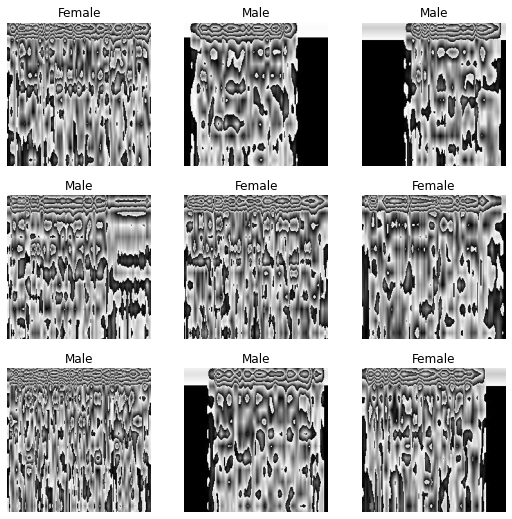

In [45]:
from fastai.vision.all import *
# Tạo DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=RegexLabeller(pat, match=1)
)

# Tạo DataLoaders
dls = dblock.dataloaders(path_img, bs=64)

# Hiển thị batch và classes
dls.show_batch()
print(dls.vocab)



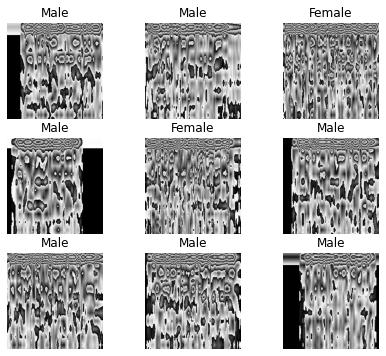

In [39]:
# Replace the old show_batch code with the following
dls.show_batch(nrows=3, ncols=3, figsize=(7,6))


In [40]:
print(dls.vocab)
print(len(dls.vocab), dls.c)


['Female', 'Male']
2 2


In [54]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

In [55]:
torch.cuda.is_available()

False

SuggestedLRs(valley=0.0020892962347716093)

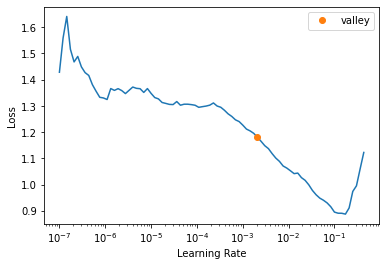

In [56]:
learn.lr_find()

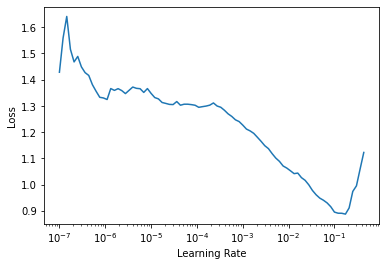

In [58]:
# Plot the learning rate finder graph
learn.recorder.plot_lr_find()

In [59]:
learn.fit_one_cycle(2, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.582051,0.223231,0.076190,19:28
1,0.260185,0.169804,0.063492,33:17


In [60]:
learn.export('resnet34_step1.pkl')

In [61]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.138457,0.048791,0.020635,36:31


In [63]:
learn.export('resnet34_step2.pkl')